# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [8]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [11]:
# Load the dataset
df = pd.read_csv("Employee_data.csv")

In [12]:
# Check the first few entries
df.head(5)

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [13]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [14]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [16]:
# Check the summary of the dataset
df.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                72197.000000  
mean                    55.711899  
std                     25.392325  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     76.000000  
max                    128.000000

### **1.3 Check the data type of columns**

In [18]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [22]:
# Check the number of missing values in each column
missing_values = df.isnull().sum()
missing_values

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [24]:
# Check the percentage of missing values in each column
missing_percentage=(missing_values/len(df)) * 100
missing_percentage

original_rows = len(df)

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [26]:
# Handle the missing value rows in the column
df.dropna(inplace=True) 

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [28]:
# Check the percentage of remaining data after missing values are removed
remaining_percentage = (len(df) / original_rows) * 100
remaining_percentage 

94.67229593888219

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [31]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def display_categorical_column_summary(df):
    import re
    cat_columns = df.select_dtypes(include=['object', 'category']).columns
    summary = {}

    for col in cat_columns:
        unique_vals = df[col].unique()
        cleaned_vals = [str(val).strip().lower() for val in unique_vals]

        # Check for potential redundancies by comparing cleaned values to original
        redundant_check = {}
        for original in unique_vals:
            cleaned = str(original).strip().lower()
            if cleaned in redundant_check:
                redundant_check[cleaned].append(original)
            else:
                redundant_check[cleaned] = [original]

        summary[col] = {
            "unique_values": unique_vals,
            "potential_redundancies": {k: v for k, v in redundant_check.items() if len(v) > 1}
        }

    return summary


In [32]:
# Check the data
redundancy_report = display_categorical_column_summary(df)
for col, info in redundancy_report.items():
    print(f"\nColumn: {col}")
    print("Unique Values:", info["unique_values"])
    if info["potential_redundancies"]:
        print("Potential Redundancies Found:")
        for norm, variants in info["potential_redundancies"].items():
            print(f" - Normalized: '{norm}' → Variants: {variants}")
    else:
        print("No potential redundancies detected.")



Column: Gender
Unique Values: ['Male' 'Female']
No potential redundancies detected.

Column: Job Role
Unique Values: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
No potential redundancies detected.

Column: Work-Life Balance
Unique Values: ['Excellent' 'Poor' 'Good' 'Fair']
No potential redundancies detected.

Column: Job Satisfaction
Unique Values: ['Medium' 'High' 'Very High' 'Low']
No potential redundancies detected.

Column: Performance Rating
Unique Values: ['Average' 'Low' 'High' 'Below Average']
No potential redundancies detected.

Column: Overtime
Unique Values: ['No' 'Yes']
No potential redundancies detected.

Column: Education Level
Unique Values: ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
No potential redundancies detected.

Column: Marital Status
Unique Values: ['Married' 'Divorced' 'Single']
No potential redundancies detected.

Column: Job Level
Unique Values: ['Mid' 'Senior' 'Entry']
No potential redundancies detected

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [34]:
# Drop redundant columns which are not required for modelling
df_model = df.drop(columns=['Employee ID'])
constant_columns = [col for col in df_model.columns if df_model[col].nunique() == 1]
df_model = df_model.drop(columns=constant_columns)

In [35]:
# Check first few rows of data
df_model.head(10)

Age  Gender  Years at Company    Job Role  Monthly Income  \
0    31    Male                19   Education            5390   
1    59  Female                 4       Media            5534   
2    24  Female                10  Healthcare            8159   
3    36  Female                 7   Education            3989   
4    56    Male                41   Education            4821   
5    38  Female                 3  Technology            9977   
6    47    Male                23   Education            3681   
7    48    Male                16     Finance           11223   
8    57    Male                44   Education            3773   
15   40  Female                 4     Finance            5176   

   Work-Life Balance Job Satisfaction Performance Rating  \
0          Excellent           Medium            Average   
1               Poor             High                Low   
2               Good             High                Low   
3               Good             High               High   
4               Fair        Very High            Average   
5               Fair             High      Below Average   
6               Fair             High               High   
7          Excellent        Very High               High   
8               Good           Medium               High   
15              Poor             High            Average   

    Number of Promotions Overtime  ...  Number of Dependents Job Level  \
0                      2       No  ...                     0       Mid   
1                      3       No  ...                     3       Mid   
2                      0       No  ...                     3       Mid   
3                      1       No  ...                     2       Mid   
4                      0      Yes  ...                     0    Senior   
5                      3       No  ...                     0       Mid   
6                      1      Yes  ...                     3     Entry   
7                      2       No  ...                     4     Entry   
8                      1      Yes  ...                     4     Entry   
15                     0       No  ...                     0     Entry   

   Company Size  Company Tenure (In Months) Remote Work  \
0        Medium                        89.0          No   
1        Medium                        21.0          No   
2        Medium                        74.0          No   
3         Small                        50.0         Yes   
4        Medium                        68.0          No   
5        Medium                        47.0          No   
6         Small                        93.0          No   
7        Medium                        88.0          No   
8        Medium                        75.0          No   
15        Small                        21.0         Yes   

   Leadership Opportunities  Innovation Opportunities Company Reputation  \
0                        No                        No          Excellent   
1                        No                        No               Fair   
2                        No                        No               Poor   
3                        No                        No               Good   
4                        No                        No               Fair   
5                        No                       Yes               Fair   
6                        No                        No               Good   
7                        No                        No          Excellent   
8                        No                        No               Fair   
15                       No                        No               Good   

   Employee Recognition Attrition  
0                Medium    Stayed  
1                   Low    Stayed  
2                   Low    Stayed  
3                Medium    Stayed  
4                Medium    Stayed  
5                  High      Left  
6                Medium      Left  
7                   Low    Stayed  
8

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [38]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [40]:
# Put all the feature variables in X
X = df_model.drop(columns=['Attrition'])

# Put the target variable in y
y = df_model['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [42]:
# Split the data into 70% train data and 30% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,random_state=42, stratify=y)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [47]:
# Select numerical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64'])
numerical_columns

Age  Years at Company  Monthly Income  Number of Promotions  \
58605   57                44            5381                     2   
61696   20                 9            9466                     0   
30474   48                 3           11420                     0   
52506   41                13           10092                     2   
1965    22                 2            7434                     0   
...    ...               ...             ...                   ...   
7259    53                21            5004                     2   
19101   48                35            9719                     1   
35543   50                 7            5820                     1   
9238    36                19            6800                     0   
67008   56                31            9169                     2   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  
58605                27.0                     4                        90.0  
61696                92.0                     1                        11.0  
30474                98.0                     2                        51.0  
52506                53.0                     1                        82.0  
1965                  6.0                     0                        64.0  
...                   ...                   ...                         ...  
7259                 31.0                     2                        65.0  
19101                40.0                     3                        69.0  
35543                56.0                     1                        44.0  
9238                 86.0                     1                        26.0  
67008                58.0                     1                        75.0  

[49444 rows x 7 columns]

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

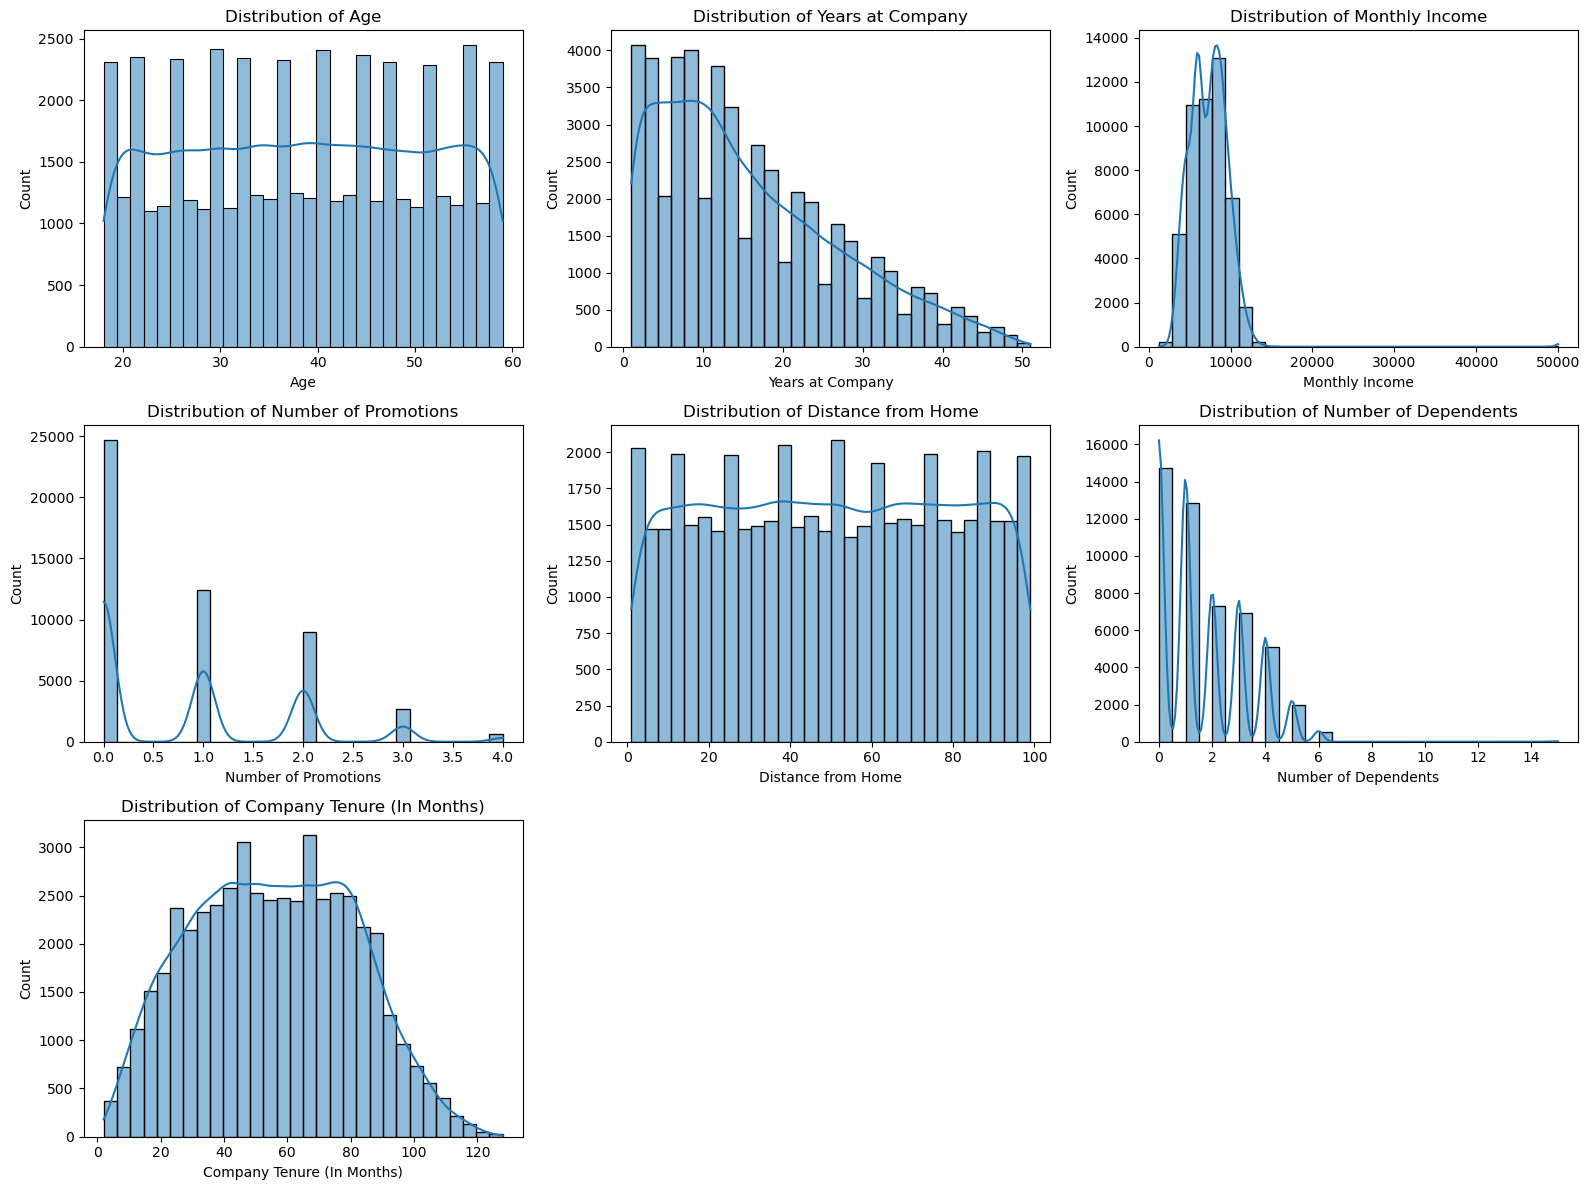

In [49]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot((len(numerical_columns.columns) + 2) // 3, 3, i)
    sns.histplot(numerical_columns[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()


# Plot boxplots for each numerical column
plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot((len(numerical_columns.columns) + 2) // 3, 3, i)
    sns.boxplot(x=numerical_columns[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()


### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

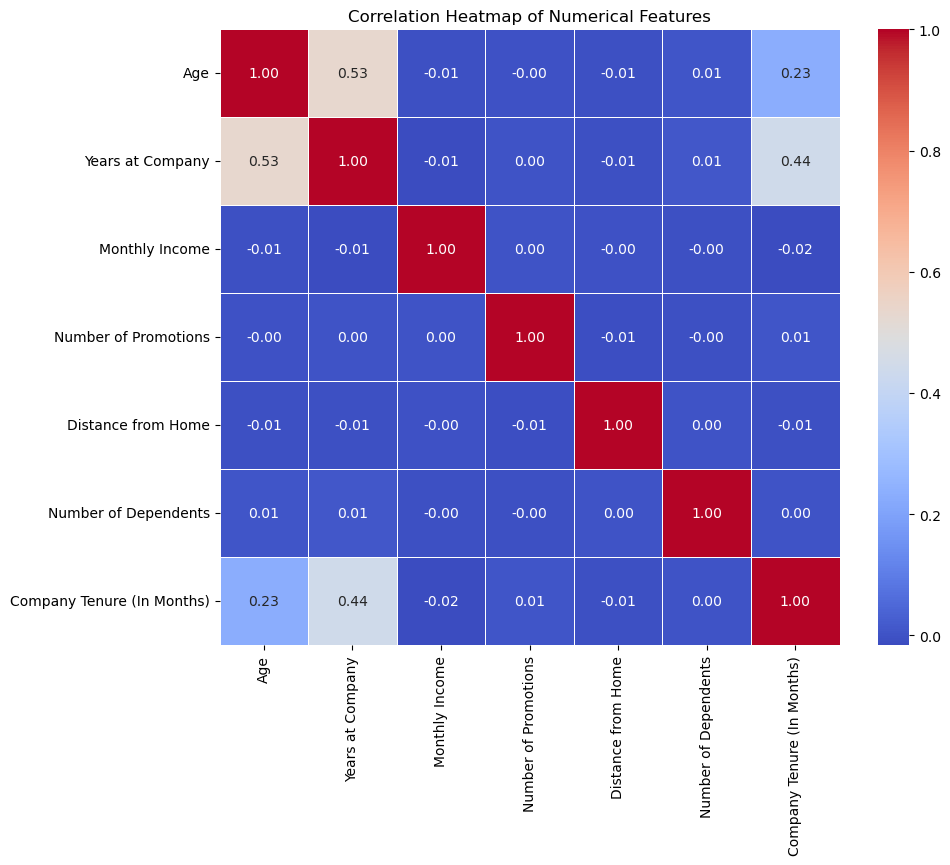

In [52]:
# Create correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

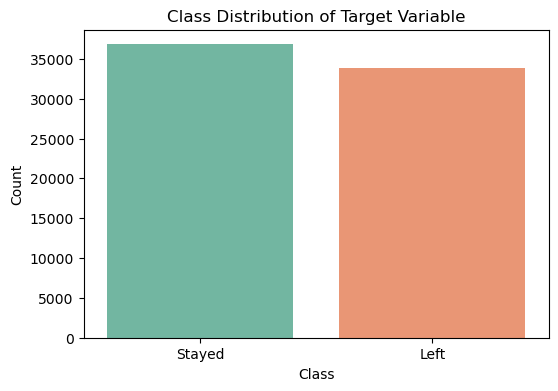

Attrition
Stayed    36810
Left      33825
Name: count, dtype: int64

In [55]:
# Plot a bar chart to check class balance
target_col = 'Attrition'

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df_model, palette='Set2')
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

df_model["Attrition"].value_counts()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

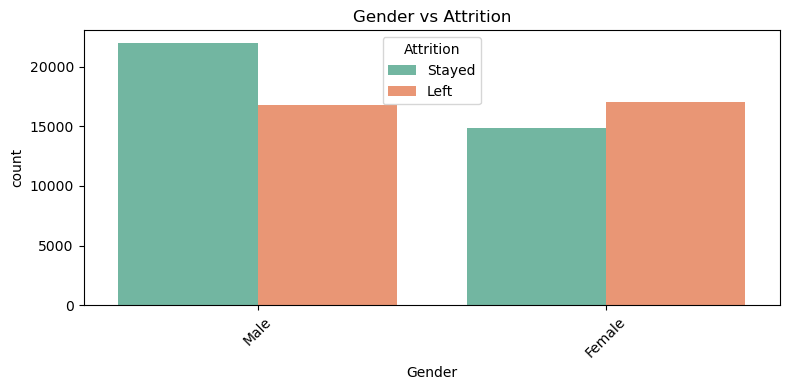

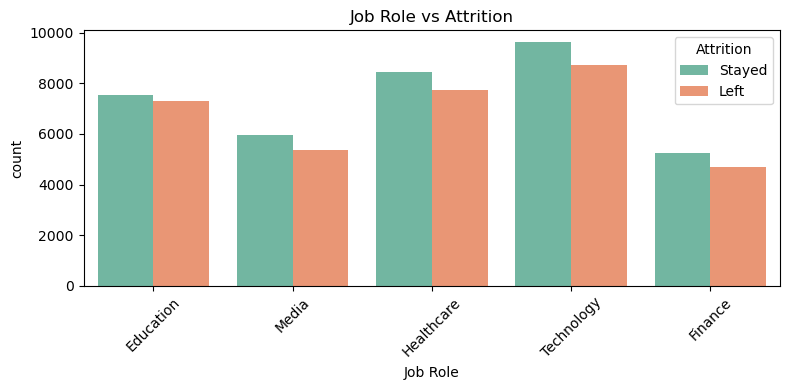

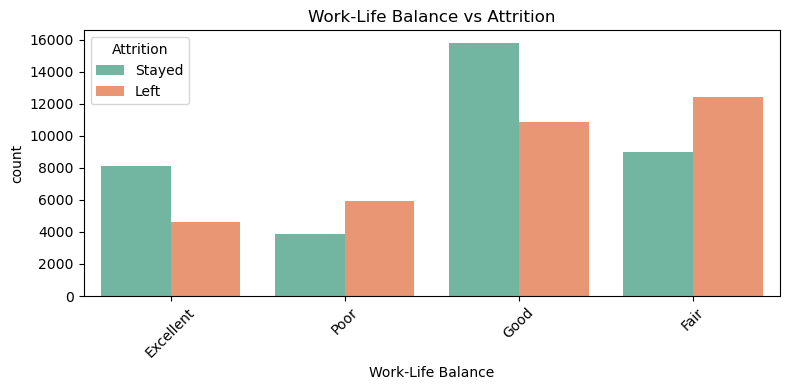

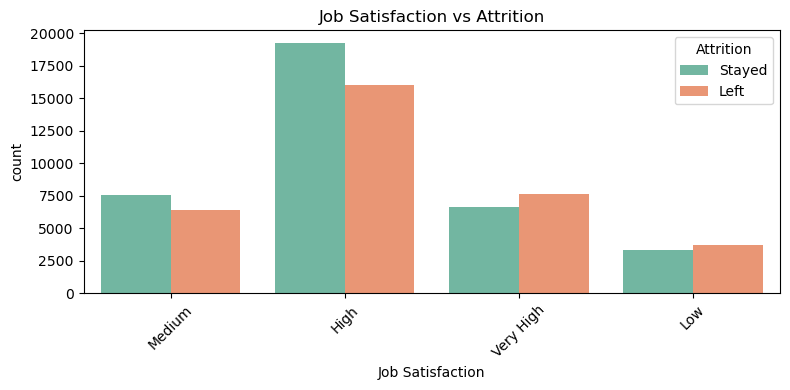

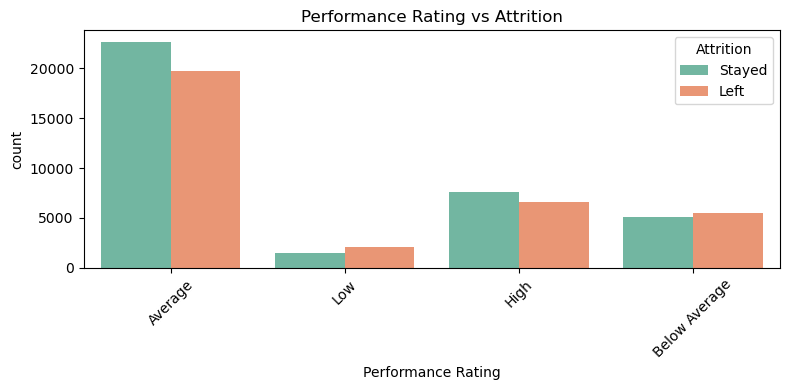

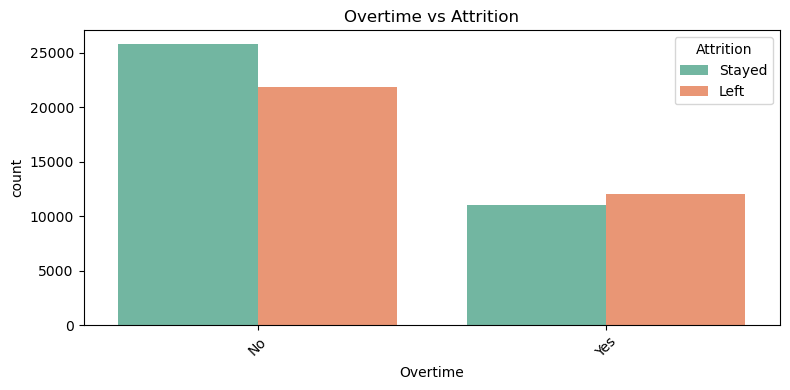

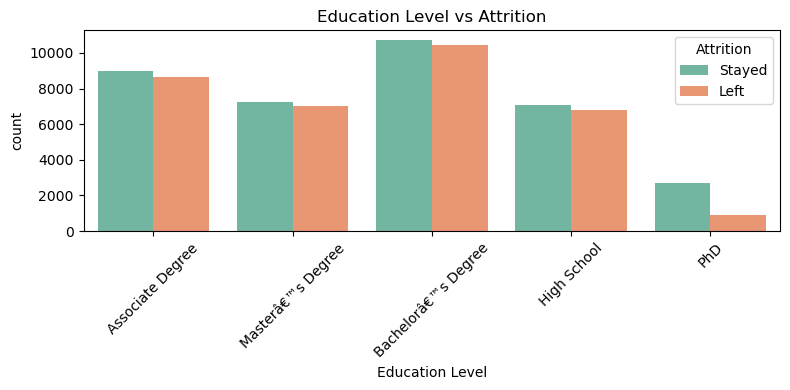

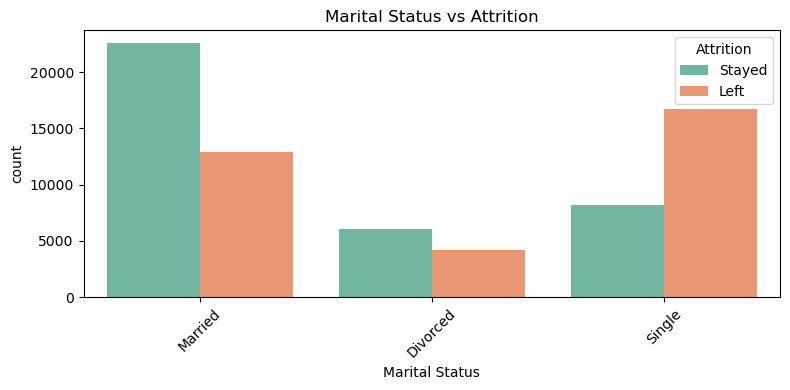

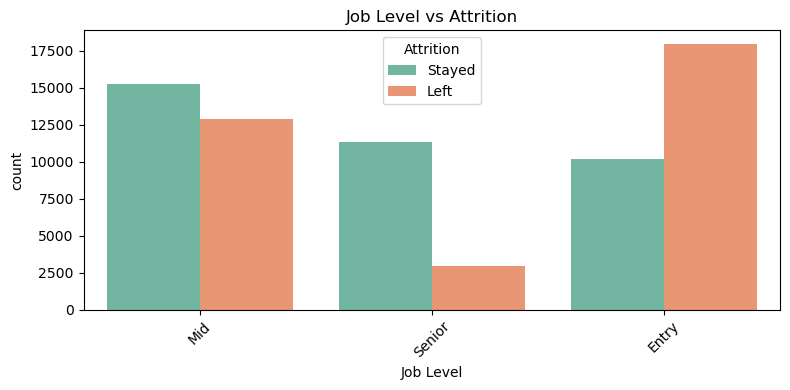

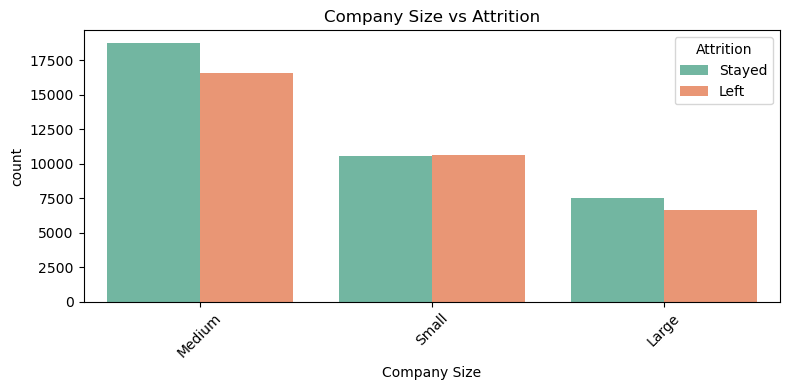

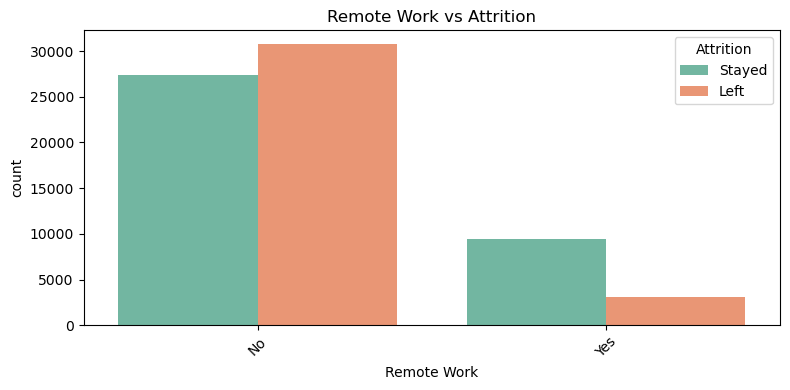

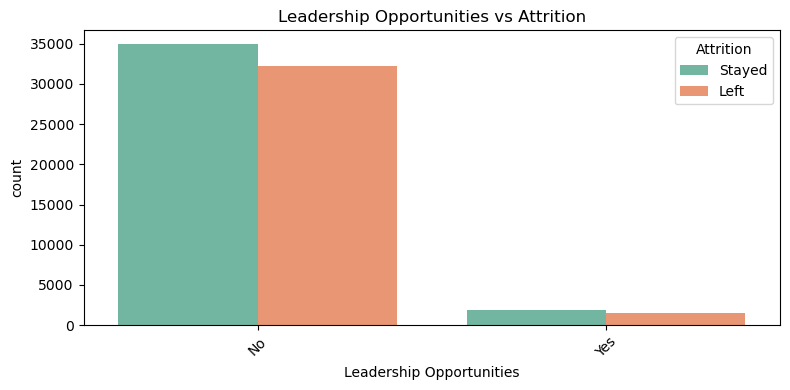

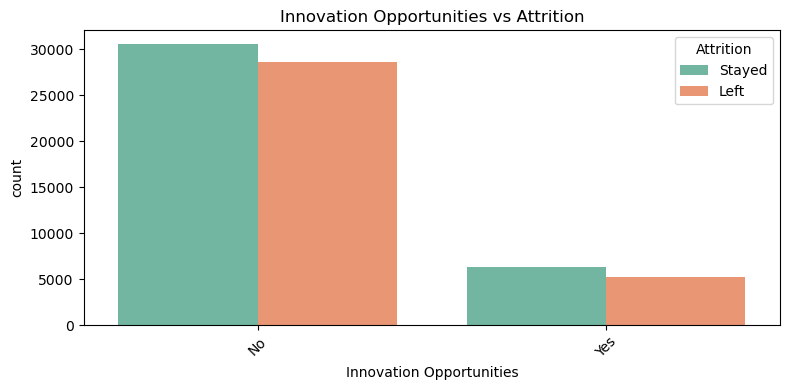

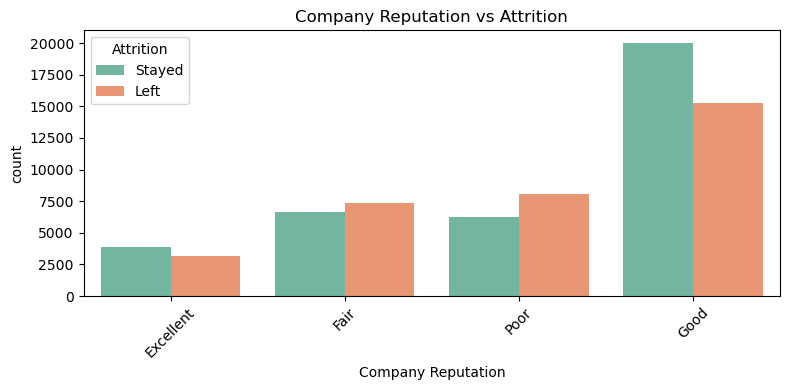

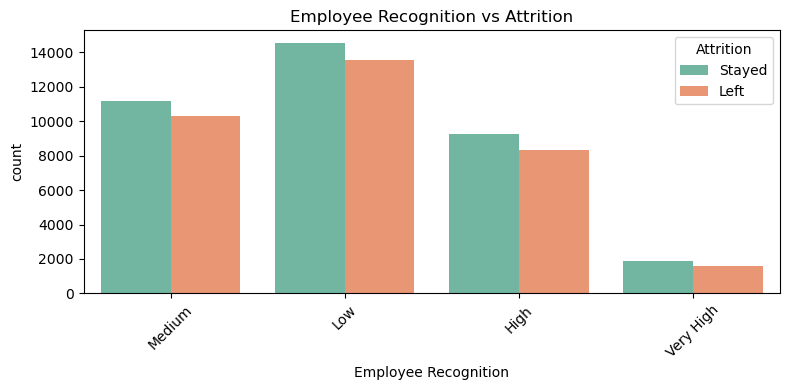

In [58]:
# Plot distribution for each categorical column with target variable
categorical_columns = df_model.select_dtypes(include='object').columns
categorical_columns = [col for col in categorical_columns if col != 'Attrition']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_model, x=col, hue='Attrition', palette='Set2')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [63]:
# Select numerical columns
numerical_columns_val = X_val.select_dtypes(include=['int64', 'float64'])

5.1.2 Plot distribution of numerical columns

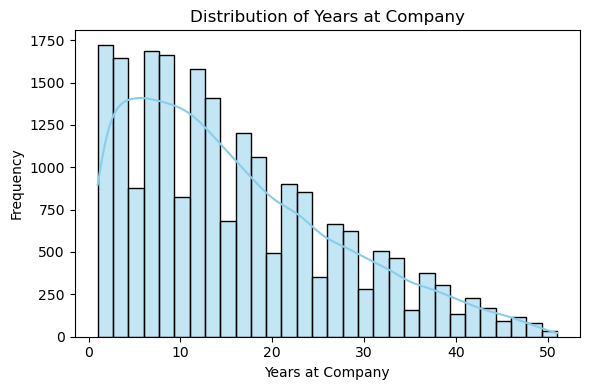

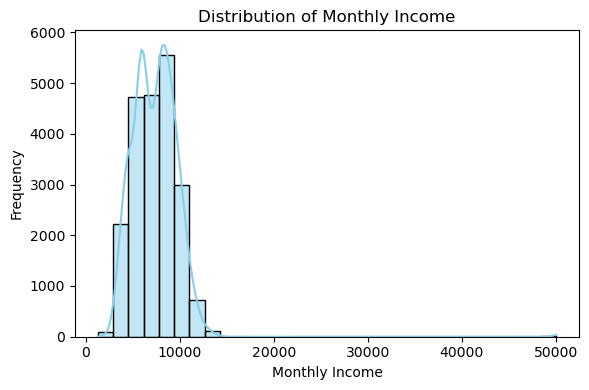

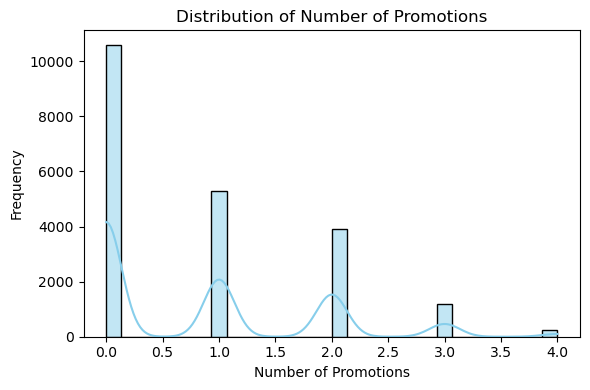

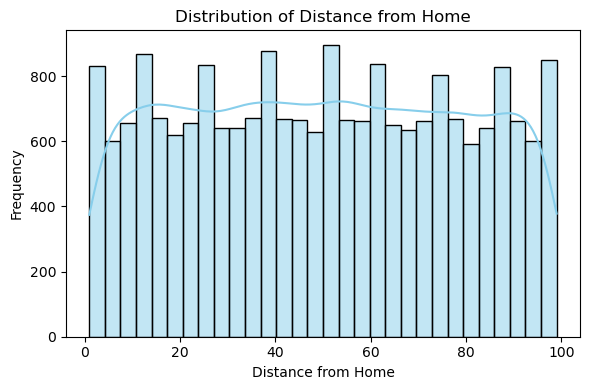

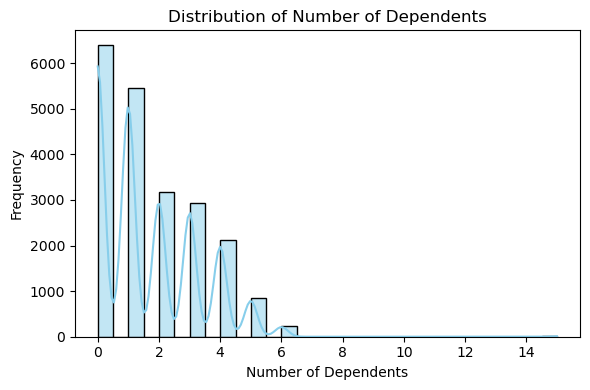

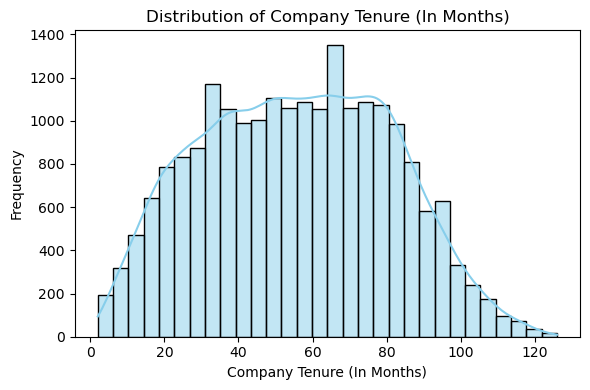

In [65]:
# Plot all the numerical columns to understand their distribution
for col in numerical_columns_val.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_val[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

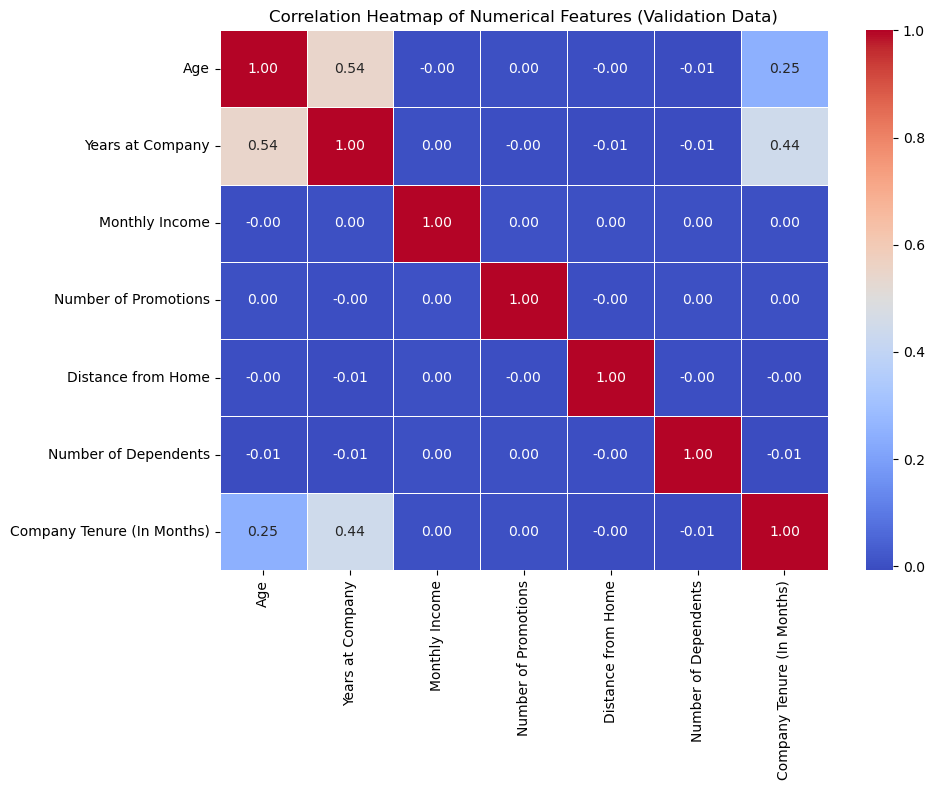

In [68]:
# Create correlation matrix for numerical columns
correlation_matrix = numerical_columns_val.corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features (Validation Data)')
plt.tight_layout()
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [71]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_val, palette='Set2')
plt.title('Class Distribution in Validation Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

y_val.value_counts()

Attrition
Stayed    11043
Left      10148
Name: count, dtype: int64

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

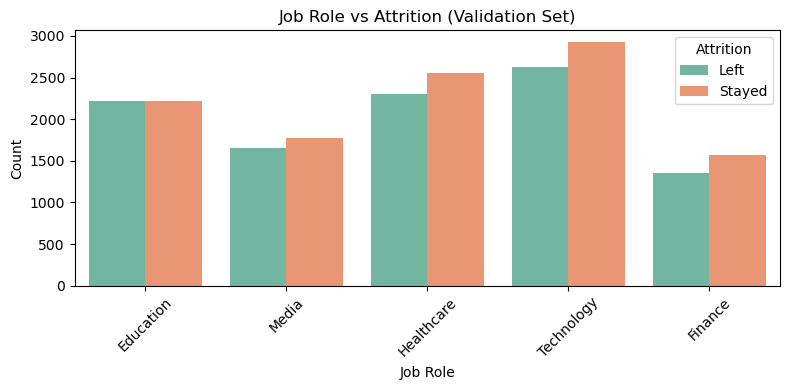

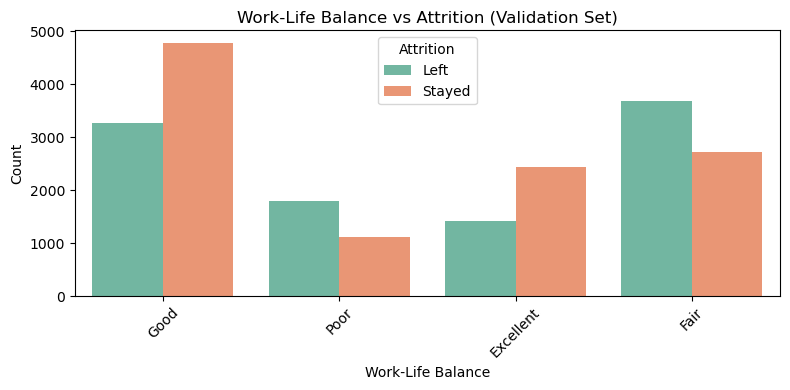

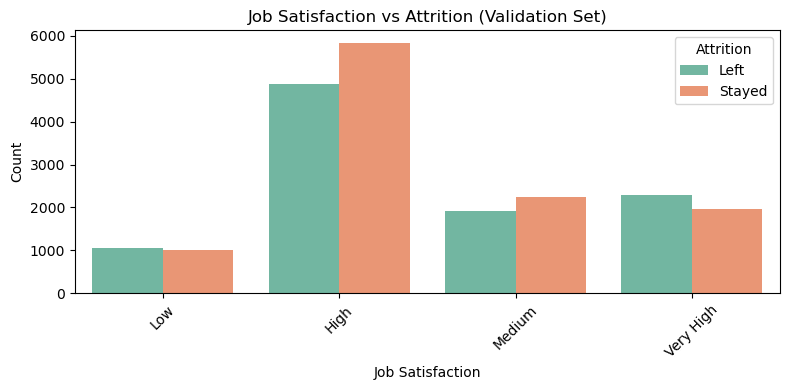

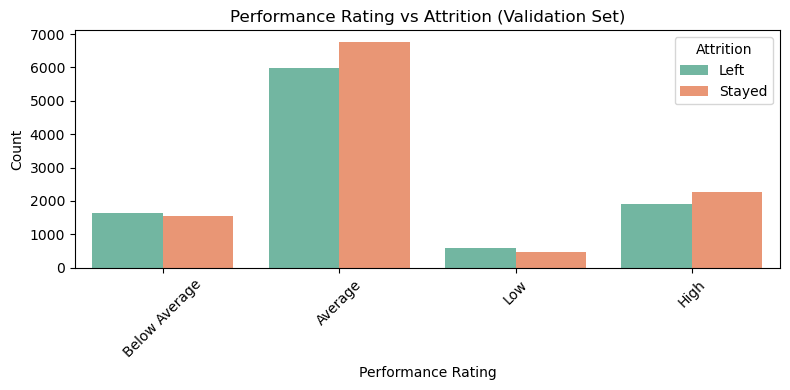

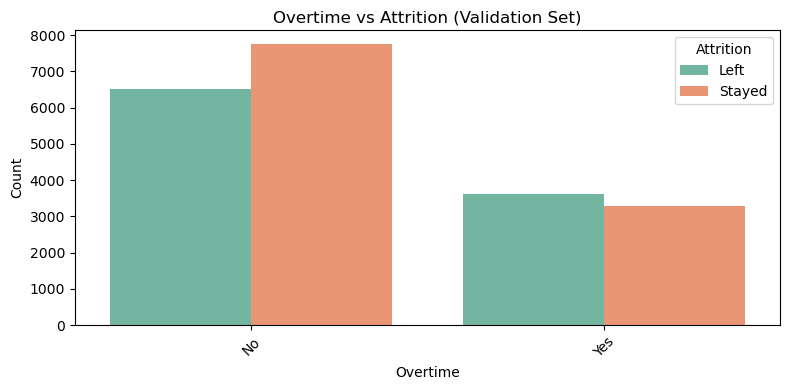

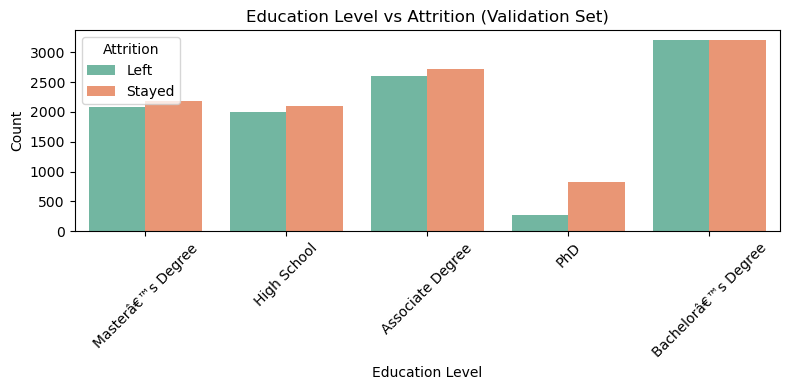

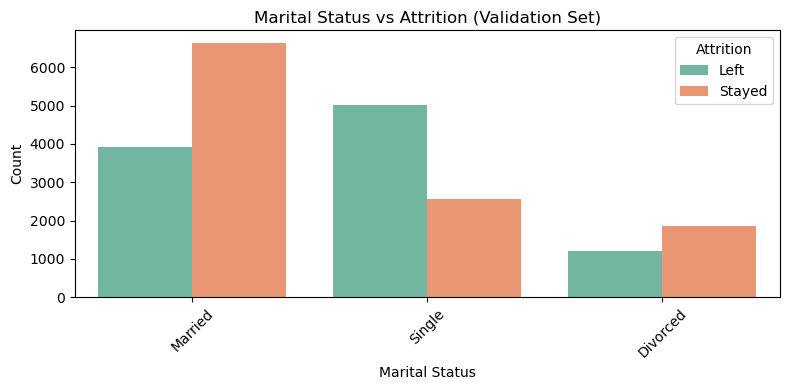

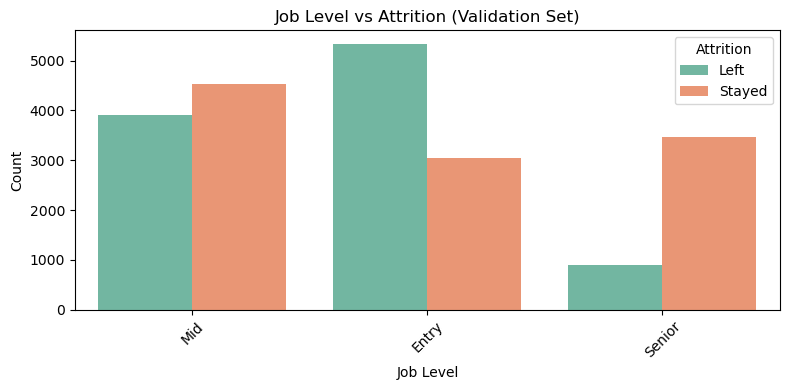

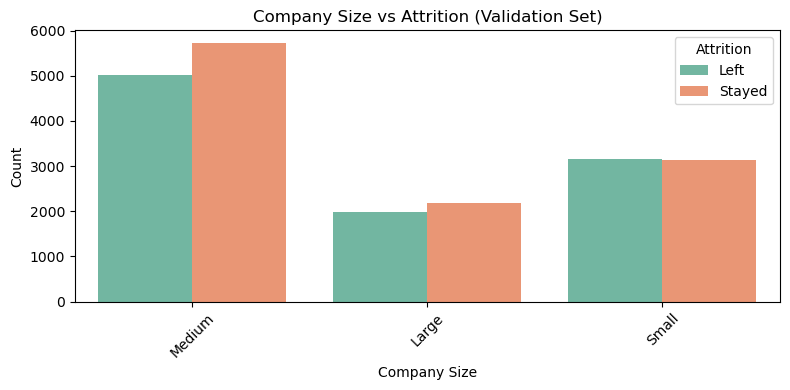

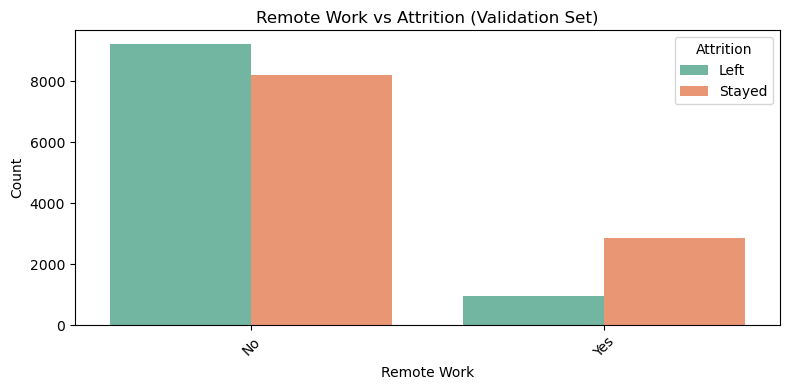

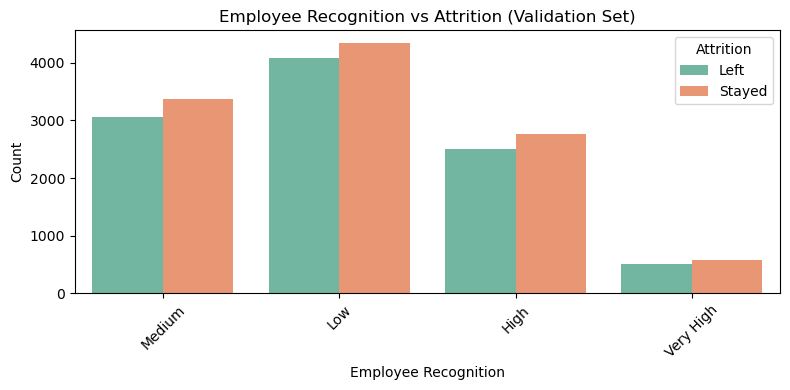

In [74]:
# Plot distribution for each categorical column with target variable
val_data = X_val.copy()
val_data['Attrition'] = y_val

categorical_columns = val_data.select_dtypes(include='object').columns
categorical_columns = [col for col in categorical_columns if col != 'Attrition']

# Step 3: Plot countplots for each categorical feature
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=val_data, x=col, hue='Attrition', palette='Set2')
    plt.title(f'{col} vs Attrition (Validation Set)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [78]:
# Check the categorical columns
categorical_columns = df_model.select_dtypes(include='object').columns
print("Categorical Columns:")
print(categorical_columns.tolist())

Categorical Columns:
['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [80]:
# Create dummy variables using the 'get_dummies' for independent columns
dummies = pd.get_dummies(df_model[categorical_columns], drop_first=True).astype(int)
# Add the results to the master DataFrame
df_model_encoded = pd.concat([df_model, dummies], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [82]:
# Drop the original categorical columns and check the DataFrame
df_model_encoded.drop(columns=categorical_columns, inplace=True)
df_model_encoded.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
0   31                19            5390                     2   
1   59                 4            5534                     3   
2   24                10            8159                     0   
3   36                 7            3989                     1   
4   56                41            4821                     0   

   Distance from Home  Number of Dependents  Company Tenure (In Months)  \
0                22.0                     0                        89.0   
1                21.0                     3                        21.0   
2                11.0                     3                        74.0   
3                27.0                     2                        50.0   
4                71.0                     0                        68.0   

   Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  Remote Work_Yes  \
0            1                 0                    0  ...                0   
1            0                 0                    0  ...                0   
2            0                 0                    1  ...                0   
3            0                 0                    0  ...                1   
4            1                 0                    0  ...                0   

   Leadership Opportunities_Yes  Innovation Opportunities_Yes  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   Company Reputation_Fair  Company Reputation_Good  Company Reputation_Poor  \
0                        0                        0                        0   
1                        1                        0                        0   
2                        0                        0                        1   
3                        0                        1                        0   
4                        1                        0                        0   

   Employee Recognition_Low  Employee Recognition_Medium  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            1   

   Employee Recognition_Very High  Attrition_Stayed  
0                               0                 1  
1                               0                 1  
2                               0                 1  
3                               0                 1  
4                               0                 1  

[5 rows x 42 columns]

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [84]:
# Create dummy variables using the 'get_dummies' for independent columns
categorical_columns_train = X_train.select_dtypes(include='object').columns
categorical_columns_val = X_val.select_dtypes(include='object').columns

print("Categorical columns in validation data:")
print(categorical_columns_val.tolist())

dummies_train = pd.get_dummies(X_train[categorical_columns_train], drop_first=True).astype(int)
dummies_val = pd.get_dummies(X_val[categorical_columns_val], drop_first=True).astype(int)

dummies_train, dummies_val = dummies_train.align(dummies_val, join='left', axis=1, fill_value=0)

# Add the results to the master DataFrame
X_train_encoded = pd.concat([X_train, dummies_train], axis=1)
X_val_encoded = pd.concat([X_val, dummies_val], axis=1)

Categorical columns in validation data:
['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


Now, drop the original categorical columns and check the DataFrame

In [86]:
# Drop categorical columns and check the DataFrame
X_val_encoded.drop(columns=categorical_columns_val, inplace=True)
X_val_encoded.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
5763    42                16            4922                     0   
70530   38                 3            6388                     0   
34157   39                23            7547                     0   
55000   28                12            6036                     3   
46994   31                14            7813                     4   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
5763                 52.0                     1                        70.0   
70530                67.0                     1                        56.0   
34157                88.0                     1                        50.0   
55000                52.0                     0                        37.0   
46994                93.0                     5                        15.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
5763             0                 0                    0  ...   
70530            1                 0                    0  ...   
34157            0                 0                    1  ...   
55000            0                 0                    0  ...   
46994            1                 0                    1  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
5763                    0                0                             0   
70530                   0                0                             0   
34157                   0                0                             0   
55000                   0                1                             0   
46994                   0                0                             0   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
5763                              1                        0   
70530                             0                        0   
34157                             0                        0   
55000                             0                        0   
46994                             0                        0   

       Company Reputation_Good  Company Reputation_Poor  \
5763                         1                        0   
70530                        1                        0   
34157                        0                        1   
55000                        0                        1   
46994                        1                        0   

       Employee Recognition_Low  Employee Recognition_Medium  \
5763                          0                            1   
70530                         1                            0   
34157                         0                            1   
55000                         1                            0   
46994                         0                            0   

       Employee Recognition_Very High  
5763                                0  
70530                               0  
34157                               0  
55000                               0  
46994                               0  

[5 rows x 41 columns]

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [88]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train_df = pd.DataFrame(y_train, columns=['Attrition'])
y_val_df = pd.DataFrame(y_val, columns=['Attrition'])

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [90]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_encoded = pd.get_dummies(y_train_df, drop_first=True).astype(int)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [92]:
# Create dummy variables using the 'get_dummies' for dependent column
y_val_encoded = pd.get_dummies(y_val_df, drop_first=True).astype(int)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [94]:
# Drop redundant columns from both train and validation
df_model_encoded.drop(columns=[col for col in ['Attrition'] if col in df_model_encoded.columns], inplace=True)
X_val_encoded.drop(columns=[col for col in ['Attrition'] if col in X_val_encoded.columns], inplace=True)


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [97]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler


6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [99]:
# Scale the numeric features present in the training set

numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include='object').columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_val_scaled = scaler.transform(X_val[numeric_columns])


# Scale the numerical features present in the validation set
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_columns, index=X_train.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=numeric_columns, index=X_val.index)


dummies_train = pd.get_dummies(X_train[categorical_columns], drop_first=True).astype(int)
dummies_val = pd.get_dummies(X_val[categorical_columns], drop_first=True).astype(int)

# Align dummy columns
dummies_train, dummies_val = dummies_train.align(dummies_val, join='left', axis=1, fill_value=0)

# Final processed datasets (scaled numeric + encoded categoricals only)
X_train_processed = pd.concat([X_train_scaled_df, dummies_train], axis=1)
X_val_processed = pd.concat([X_val_scaled_df, dummies_val], axis=1)


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [103]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [105]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train_processed, y_train)

rfe.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
        True, False,  True,  True, False, False, False,  True, False,
        True,  True,  True, False, False,  True, False, False,  True,
       False,  True, False, False, False])

In [106]:
# Display the features selected by RFE
feature_ranks = list(zip(X_train_processed.columns, rfe.support_, rfe.ranking_))
feature_ranks

[('Age', False, 16),
 ('Years at Company', False, 8),
 ('Monthly Income', False, 27),
 ('Number of Promotions', False, 5),
 ('Distance from Home', False, 3),
 ('Number of Dependents', False, 6),
 ('Company Tenure (In Months)', False, 22),
 ('Gender_Male', True, 1),
 ('Job Role_Finance', False, 12),
 ('Job Role_Healthcare', False, 15),
 ('Job Role_Media', False, 13),
 ('Job Role_Technology', False, 14),
 ('Work-Life Balance_Fair', True, 1),
 ('Work-Life Balance_Good', False, 4),
 ('Work-Life Balance_Poor', True, 1),
 ('Job Satisfaction_Low', True, 1),
 ('Job Satisfaction_Medium', False, 24),
 ('Job Satisfaction_Very High', True, 1),
 ('Performance Rating_Below Average', True, 1),
 ('Performance Rating_High', False, 20),
 ('Performance Rating_Low', True, 1),
 ('Overtime_Yes', True, 1),
 ('Education Level_Bachelorâ€™s Degree', False, 23),
 ('Education Level_High School', False, 25),
 ('Education Level_Masterâ€™s Degree', False, 26),
 ('Education Level_PhD', True, 1),
 ('Marital Status_Mar

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [108]:
# Put columns selected by RFE into variable 'col'
col = X_train_processed.columns[rfe.support_].tolist()
col

['Gender_Male',
 'Work-Life Balance_Fair',
 'Work-Life Balance_Poor',
 'Job Satisfaction_Low',
 'Job Satisfaction_Very High',
 'Performance Rating_Below Average',
 'Performance Rating_Low',
 'Overtime_Yes',
 'Education Level_PhD',
 'Marital Status_Single',
 'Job Level_Mid',
 'Job Level_Senior',
 'Remote Work_Yes',
 'Company Reputation_Fair',
 'Company Reputation_Poor']

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [111]:
# Select only the columns selected by RFE
X_train_selected = X_train_processed[col]
X_val_selected = X_val_processed[col]

In [112]:
# View the training data
X_train_selected.head()


Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
58605            0                       0                       0   
61696            0                       0                       0   
30474            1                       0                       0   
52506            0                       0                       0   
1965             0                       0                       0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
58605                     0                           0   
61696                     0                           0   
30474                     0                           0   
52506                     0                           0   
1965                      1                           0   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
58605                                 0                       0             1   
61696                                 1                       0             0   
30474                                 0                       0             1   
52506                                 0                       0             0   
1965                                  0                       0             0   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
58605                    0                      1              1   
61696                    0                      1              0   
30474                    0                      0              0   
52506                    0                      0              0   
1965                     0                      0              0   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
58605                 0                0                        0   
61696                 1                0                        1   
30474                 0                0                        1   
52506                 0                1                        0   
1965                  0                0                        1   

       Company Reputation_Poor  
58605                        0  
61696                        0  
30474                        0  
52506                        1  
1965                         0

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [114]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_selected)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [116]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logm2 = sm.GLM(y_train_encoded, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Attrition_Stayed   No. Observations:                49444
Model:                            GLM   Df Residuals:                    49428
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25046.
Date:                Mon, 21 Apr 2025   Deviance:                       50091.
Time:                        14:50:19   Pearson chi2:                 4.62e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3102
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [119]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
# Make a VIF DataFrame for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_selected.columns
vif['VIF'] = [variance_inflation_factor(X_train_selected.values, i) 
              for i in range(X_train_selected.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif


Features   VIF
0                        Gender_Male  1.84
10                     Job Level_Mid  1.65
9              Marital Status_Single  1.42
1             Work-Life Balance_Fair  1.41
7                       Overtime_Yes  1.38
11                  Job Level_Senior  1.32
14           Company Reputation_Poor  1.26
13           Company Reputation_Fair  1.25
4         Job Satisfaction_Very High  1.23
2             Work-Life Balance_Poor  1.19
12                   Remote Work_Yes  1.18
5   Performance Rating_Below Average  1.15
3               Job Satisfaction_Low  1.12
6             Performance Rating_Low  1.05
8                Education Level_PhD  1.05

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [123]:
# Predict the probabilities on the training set
y_train_pred_probs = res.predict(X_train_sm)
print(y_train_pred_probs.head())

58605    0.306523
61696    0.543879
30474    0.488797
52506    0.772961
1965     0.314219
dtype: float64


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [125]:
# Reshape it into an array
y_train_pred_probs_array = y_train_pred_probs.values.reshape(-1, 1)

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [127]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
predicted_df = pd.DataFrame({
    'Actual': y_train.values,
    'Predicted_Probability': y_train_pred_probs
})

print(predicted_df.head())

       Actual  Predicted_Probability
58605  Stayed               0.306523
61696  Stayed               0.543879
30474    Left               0.488797
52506  Stayed               0.772961
1965     Left               0.314219


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [129]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
predicted_df['Predicted'] = (predicted_df['Predicted_Probability'] >= 0.5).astype(int)
print(predicted_df.head())

       Actual  Predicted_Probability  Predicted
58605  Stayed               0.306523          0
61696  Stayed               0.543879          1
30474    Left               0.488797          0
52506  Stayed               0.772961          1
1965     Left               0.314219          0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [132]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = metrics.accuracy_score(predicted_df['Actual'].map({'Stayed': 1, 'Left': 0}), predicted_df['Predicted'])
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7375


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [134]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
actual_binary = predicted_df['Actual'].map({'Stayed': 1, 'Left': 0})
conf_matrix = confusion_matrix(actual_binary, predicted_df['Predicted'])
conf_matrix

array([[16996,  6681],
       [ 6297, 19470]], dtype=int64)

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [136]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = conf_matrix.ravel()

# Display them
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Positives (TP):", tp)

True Negatives (TN): 16996
False Positives (FP): 6681
False Negatives (FN): 6297
True Positives (TP): 19470


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [138]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
round(sensitivity,4)

0.7556

In [139]:
# Calculate specificity
specificity = tn / (tn + fp)
round(specificity,4)

0.7178

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [141]:
# Calculate precision
precision = tp / (tp + fp)
round(precision,4)

0.7445

In [142]:
# Calculate recall
recall = tp / (tp + fn)
round(recall,4)

0.7556

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [145]:
# Define ROC function
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc_score = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return auc_score


In [146]:
y_train_binary = y_train.map({'Stayed': 1, 'Left': 0})


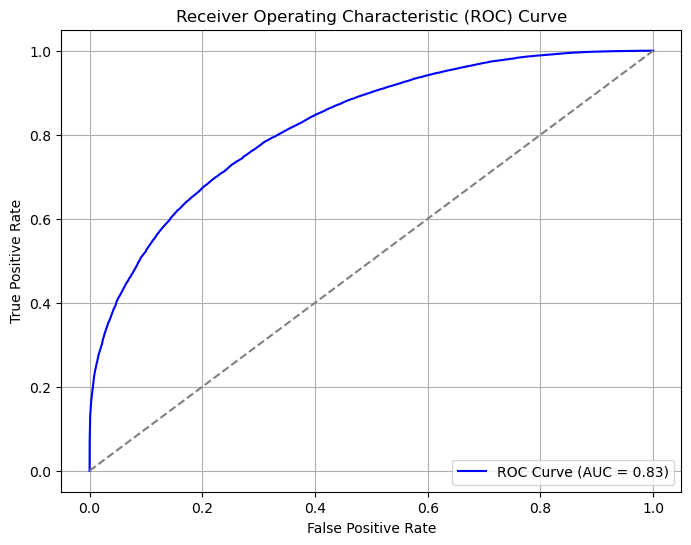

AUC Score: 0.8257


In [147]:
# Call the ROC function
auc_score = plot_roc(y_train_binary, y_train_pred_probs)
print("AUC Score:", round(auc_score, 4))

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [150]:
y_train_pred_final = pd.DataFrame({'Actual':y_train_binary, 'Predicted_Probabilities':y_train_pred_probs})

In [151]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=  y_train_pred_probs.map(lambda x: 1 if x > i else 0)

In [152]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
y_train_pred_final.rename(columns={'Churn_Prob': 'Predicted_Probabilities'}, inplace=True)
y_train_pred_final.head()

Actual  Predicted_Probabilities  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
58605       1                 0.306523    1    1    1    1    0    0    0   
61696       1                 0.543879    1    1    1    1    1    1    0   
30474       0                 0.488797    1    1    1    1    1    0    0   
52506       1                 0.772961    1    1    1    1    1    1    1   
1965        0                 0.314219    1    1    1    1    0    0    0   

       0.7  0.8  0.9  
58605    0    0    0  
61696    0    0    0  
30474    0    0    0  
52506    1    0    0  
1965     0    0    0

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [154]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_binary, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.521135  1.000000  0.000000
0.1   0.1  0.587938  0.994916  0.145035
0.2   0.2  0.660464  0.962083  0.332221
0.3   0.3  0.704494  0.909225  0.481691
0.4   0.4  0.729654  0.841037  0.608439
0.5   0.5  0.737521  0.755618  0.717827
0.6   0.6  0.730544  0.645166  0.823457
0.7   0.7  0.704656  0.526177  0.898889
0.8   0.8  0.659534  0.386386  0.956794
0.9   0.9  0.590345  0.220903  0.992398


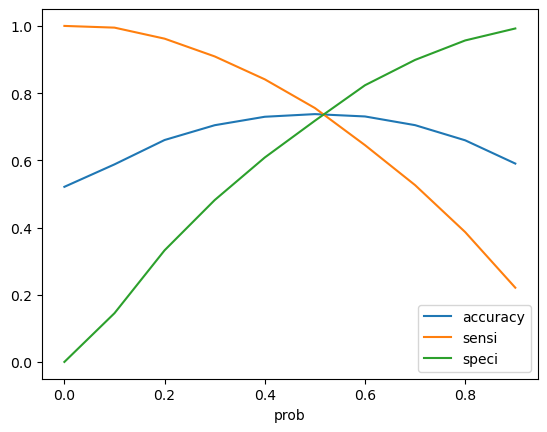

In [155]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [157]:
# Create a column for final prediction based on the optimal cutoff

#from above image we get 0.56 as optimal cutoff
y_train_pred_final['final_predicted'] = y_train_pred_probs.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

Actual  Predicted_Probabilities  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
58605       1                 0.306523    1    1    1    1    0    0    0   
61696       1                 0.543879    1    1    1    1    1    1    0   
30474       0                 0.488797    1    1    1    1    1    0    0   
52506       1                 0.772961    1    1    1    1    1    1    1   
1965        0                 0.314219    1    1    1    1    0    0    0   

       0.7  0.8  0.9  final_predicted  
58605    0    0    0                0  
61696    0    0    0                0  
30474    0    0    0                0  
52506    1    0    0                1  
1965     0    0    0                0

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [159]:
# Calculate the accuracy
metrics.accuracy_score(y_train_binary, y_train_pred_final.final_predicted)

0.7363077420920637

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [161]:
# Create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_binary, y_train_pred_final.final_predicted )
confusion2

array([[18219,  5458],
       [ 7580, 18187]], dtype=int64)

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [163]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [165]:
# Calculate Sensitivity
TP / float(TP+FN)

0.7058252803974076

In [166]:
# Calculate Specificity
TN / float(TN+FP)

0.7694809308611733

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [168]:
# Calculate Precision
precision = TP / (TP + FP)
round(precision,4)

0.7692

In [169]:
# Calculate Recall
recall = TP / (TP + FN)
round(recall,4)

0.7058

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [171]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [172]:
# Check actual and predicted values from initial model
y_train_binary, y_train_pred_final.final_predicted

(58605    1
 61696    1
 30474    0
 52506    1
 1965     0
         ..
 7259     0
 19101    0
 35543    1
 9238     1
 67008    1
 Name: Attrition, Length: 49444, dtype: int64,
 58605    0
 61696    0
 30474    0
 52506    1
 1965     0
         ..
 7259     0
 19101    0
 35543    1
 9238     1
 67008    1
 Name: final_predicted, Length: 49444, dtype: int64)

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

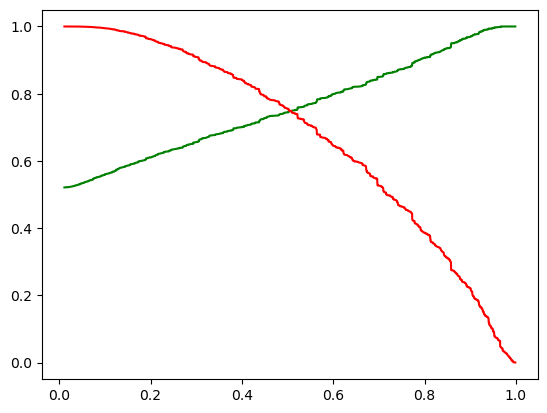

In [174]:
# Plot precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_binary, y_train_pred_final.Predicted_Probabilities)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [178]:
# Select the relevant features for validation set
X_val_selected = X_val_processed[col]



8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [180]:
# Add constant to X_validation
X_val_selected_sm = sm.add_constant(X_val_selected)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [182]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = res.predict(X_val_selected_sm)
# View predictions
y_validation_pred.head()

5763     0.599663
70530    0.641336
34157    0.474507
55000    0.865321
46994    0.229619
dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [184]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred, columns=['predicted_probability'])
# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_val_encoded.values, columns=['Actual'])
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
actual.reset_index(drop=True, inplace=True)
predicted_probability.reset_index(drop=True, inplace=True)

y_val_pred_final = pd.concat([actual, predicted_probability], axis=1)

In [185]:
y_val_pred_final

Actual  predicted_probability
0           0               0.599663
1           0               0.641336
2           1               0.474507
3           1               0.865321
4           0               0.229619
...       ...                    ...
21186       1               0.415195
21187       1               0.781419
21188       0               0.421695
21189       1               0.857617
21190       0               0.304187

[21191 rows x 2 columns]

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [187]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_val_pred_final['final_prediction'] = y_val_pred_final['predicted_probability'].map(lambda x: 1 if x > 0.55 else 0)
# Check the DataFrame
y_val_pred_final.head()

Actual  predicted_probability  final_prediction
0       0               0.599663                 1
1       0               0.641336                 1
2       1               0.474507                 0
3       1               0.865321                 1
4       0               0.229619                 0

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [189]:
# Calculate the overall accuracy
metrics.accuracy_score(y_val_pred_final.Actual, y_val_pred_final.final_prediction)

0.7365390967863715

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [191]:
# Create confusion matrix
confusion3 = metrics.confusion_matrix(y_val_pred_final.Actual, y_val_pred_final.final_prediction)
confusion3

array([[7814, 2334],
       [3249, 7794]], dtype=int64)

In [192]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [194]:
# Calculate sensitivity
TP / float(TP+FN)

0.7057864710676447

In [195]:
# Calculate specificity
TN / float(TN+FP)

0.7700039416633819

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [197]:
# Calculate precision
precision = TP / (TP + FP)
round(precision,4)

0.7695

In [198]:
# Calculate recall
recall = TP / (TP + FN)
round(recall,4)

0.7058

## Conclusion



### Precision-Recall Tradeoff and Sensitivity-Specificity-Accuracy optimum tradeoff is same Its a good sign It shows our model has a consistent optimal threshold that performs well across multiple evaluation angles.
### Training accuracy is 0.73 and Validation accuracy is 0.73 it also shows Our model performs good in real time world data
### During EDA we have seen when role is technology , company reputation is  good , work-life balance is good most of the people stayed
### Factors we should consider most to see whether employee will stay or not is 'Gender_Male','Work-Life Balance_Fair',Work-Life Balance_Poor',Job Satisfaction_Low','Job Satisfaction_Very High','Performance Rating_Below Average','Performance Rating_Low','Overtime_Yes','Education Level_PhD','Marital Status_Single','Job Level_Mid','Job Level_Senior', 'Remote Work_Yes','Company Reputation_Fair', 'Company Reputation_Poor']
### Variable year is not  Required